# Introduction

This notebook is based on the Kaggle kernel by mnassrib (https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python/data).

Like all regression analyses, the logistic regression is a predictive analysis. However, despite the name logistic *regression*, it is actually a method for doing (two-class) *classification* of a binary target variable.

The aim is to predict the _probability_ of an observation to belong a class (C1 - yes/ C0 - no), given the input features $x$:  $p(C_1|x)=y(x)$.

In [2]:
import pandas as pd
movie = pd.read_csv('./data/movie.csv')

## A simple (and fake) dataset to see how logistic regression works

We have a small dataset, that we will use to predict if we can predict if someone will like the movie if we know the person's age. This is how our data look like:

![](./img/movie-scatter.svg)

So, the older people are the less they seem to like it...

### Logistic regression, a simplified explanation
What could we do to predict if someone of a given age will like the movie? We could fit a linear regression. The result would look similar to this:

![](./img/movie-linear.svg)

There is a problem here. The linear regression predicts a continuous outcome y that can take any value between $-\infty$ and $\infty$. But what we want to predict is a binary outcome: We have two classes, people that liked the movie (y=1) and people that didn't like it (y=0).


A simple solution: We take a threshold and classify anything that is below a cutoff value for y as 1 and the rest as 0. It could look like that: 

![](./img/movie-threshold.svg)

This solution is harder to optimize numerically (a threshold is not a differentiable function, it is not even continuous). And we can't really see how certain the model is in its decision. 

Here's a better idea: We will use a smooth (and differentiable) function that produces something like a smoothed threshold (and squashes the values of the regression between [0,1]). The we could interpret the result as a probability: the probability of liking the movie $y$, given the age $x$: $P("likes movie"|x)$. A good nonlinear function to use is the logistic sigmoid: it looks like this:

![](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

It has everything we need: it maps values from $(-\infty, \infty)$ to $(0,1)$, and it is smooth and differentiable. Nice...

If we use this function and fit it to our data, the result would look like this:
![](./img/movie-logistic.svg)

We give the model the age and it will predict the probability of liking the movie. That is the basic idea of logistic regression. 

### A bit more mathematical explanation

So why the logistic function? There is a deeper relation here. Let's start a bit more abstract. We need a function that takes the value x (the person is x years old) and outputs a probability $p("liked movie"|x)$ (e.g. the person likes the movie). And we want to have a linear relationship between our explanatory variable $x$ and the prediction $p("liked movie"|x)=y(w_1 x + w_0)$. We cannot predict a probability directly because a valid probability needs to lie in the range $[0,1]$, but we could predict the odds (https://en.wikipedia.org/wiki/Odds), the  likelihood that you will like the movie: $\frac{p("likes movie")}{p("doesnt like movie")}=\frac{p("likes movie")}{1-p("likes movie")}$. This ratio lies in the interval $(0,\infty)$, so we are getting closer... 

If we now just take the log of the odds (the _logit_): $\log(\frac{p("likes movie")}{1-p("likes movie")})$ we have some measure that lies in the range $(-\infty,\infty)$ and that we could nicely predict with a linear model: $\log(\frac{p("likes movie"|w_1 x + w_0)}{1-p("likes movie"|w_1 x + w_0)} = w_1 x + w_0$. All we need is a function $\sigma$ that satisfies the relation $\log(\frac{\sigma(w_1 x + w_0)}{1-\sigma(w_1 x + w_0)}) = w_1 x + w_0$... If we exponentiate both sides. There is indeed (surprise!) a function with this property: the logistic sigmoid: $\sigma(v)=\frac{1}{1+\exp(-v)}$. You can see that it works by substituting the definition of the sigmoid into $\log(\frac{\sigma(w_1 x + w_0)}{1-\sigma(w_1 x + w_0)}) = w_1 x + w_0$.

So the sigmoid is exactly the nonlinear function that we need to use a linear regression model of the data and transform the outcome into a probability, so we can do prediction. In statistics, this nonlinear function is called the _link function_ and there is a particular link function for different problems. As we have seen, for binary classification, the link is the logistic sigmoid, for multi-class classification the link function will turn out to be the softmax, and there are more. For those of you who worked with artificial neural networks before: This property of is exactly the reason why the sigmoid is used as the nonlinear activation function for binary classification problems. 

## A probabilistic view on classification

We will look at a two-class classification problem, i.e. an observations falls into $C_1$ or $C_0$.
We use the class-conditional densities $p(x|C_k)$ and the class prior probabilities $p(C_k)$ to compute the posterior probabilities of the class given the observation using Bayes' theorem: 
$$p(C_1|x) = \frac{p(x|C_1)p(C_1)}{p(x|C_1)p(C_1)+p(x|C_0)p(C_0)}.$$

If we now define $o$ to be $$o(x) = \log \frac{p(x|C_1)p(C_1)}{p(x|C_0)p(C_0)} = \log \frac{p(x|C_1)p(C_1)}{1- p(x|C_1)p(C_1)}$$, and that means $o$ is simply the log odds, then we get: 
$$ p(C_1|x) = \frac{1}{1+exp(-o)}$$ and this is indeed just the logistic sigmoid function $\sigma(o)$. And it's inverse is just the logit (log odds) function : $$o(\sigma) = \log \frac{\sigma}{1-\sigma}.$$

So if we model the log odds $o(x)$ as a linear function of the features $x$, we get a generalized linear model. So we compute a linear model of the inputs and use the sigmoid as a nonlinear function (called the activation function in neural network research) and end up with logistic regression. The name might be a bit confusing, as we actually used it for classification, but we are predicting a probability (a continuous outcome), so the name is not wrong... 

## Assumptions for logistic regression

- the outcome y to be predicted is a binary variable (yes/no)
    - (y = 1 typically present the desired case.)
- The features or covariates $x$ should be independent, i.e. there is no multicollinearity (or as little at possible).
- the features $x$ are linearly related to log odds
- we need a large sample sizes (reference?)

## The Titanic Data set

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Overview
The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### Data Dictionary

Variable | Definition | Key
---|---|---
survival|Survival|0 = No, 1 = Yes
pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd
sex|Sex|
Age|Age in years|
sibsp|# of siblings / spouses aboard the Titanic|
parch|# of parents / children aboard the Titanic|
ticket|Ticket number|
fare|Passenger fare|
cabin|Cabin number|
embarked|Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton|

### Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

<a id="t1."></a>
# 1. Import Data & Python Packages

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Read CSV training data file into a pandas DataFrame
train_df = pd.read_csv("./data/train.csv")

# Read CSV test data into a pandas DataFrame
test_df = pd.read_csv("./data/test.csv")

# preview the data organization
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('The number of samples in the train data is {}.'.format(train_df.shape[0]))

The number of samples in the train data is 891.


In [3]:
# the test data has the same structure
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print('The number of samples in the test data is {}.'.format(test_df.shape[0]))

The number of samples in the test data is 418.


<font color=red>  Note: there is no target variable in test data (i.e. "Survival" column is missing), as the goal is to predict this target using machine learning algorithms such as logistic regression. </font>

<a id="t2."></a>
# 2. Data Quality & Missing Value Assessment

In [7]:
# check missing values in train data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<a id="t2.1."></a>
## 2.1.    Age - Missing Values

In [8]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


~20% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

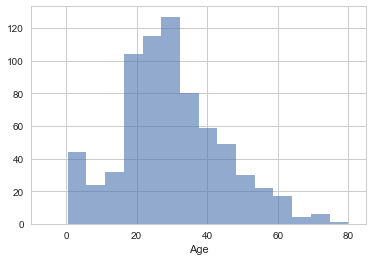

In [25]:
ax = train_df["Age"].hist(bins=15, stacked=True,  alpha=0.6)
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values. 

In [12]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


<a id="t2.2."></a>
## 2.2. Cabin - Missing Values

In [13]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise.  We'll ignore this variable in our model.

<a id="t2.3."></a>
## 2.3. Embarked - Missing Values

In [14]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


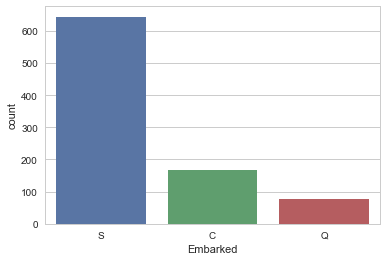

In [26]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df)
plt.show()

In [16]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


By far the most passengers boarded in Southhampton, so we'll impute those 2 NaN's w/ "S".

<a id="t2.4."></a>
## 2.4. Final Adjustments to Data (Train & Test)

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:
* If "Age" is missing for a given row, I'll impute with 28 (median age).
* If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port).
* I'll ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, it appears that this value is associated with the passenger's class and fare paid.

In [84]:
train_data = train_df.copy()
#train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data=train_data.dropna(subset=["Age"])
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [85]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [86]:
# preview adjusted train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


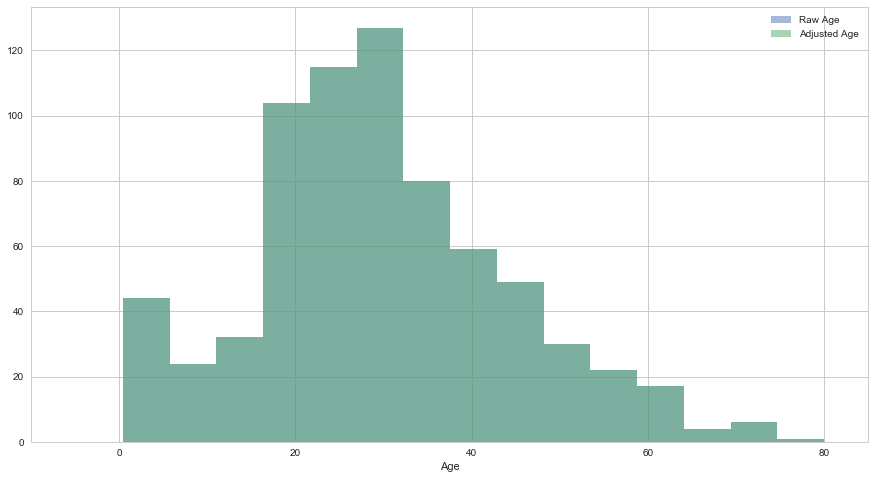

In [87]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, stacked=True, alpha=0.5)
ax = train_data["Age"].hist(bins=15,  stacked=True, alpha=0.5)
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

<a id="t2.4.1."></a>
## 2.4.1. Additional Variables

According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family.  For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [88]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

I'll also create categorical variables for Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked"). 

In [89]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


### Now, apply the same changes to the test data. <br>
I will apply to same imputation for "Age" in the Test data as I did for my Training data (if missing, Age = 28).  <br> I'll also remove the "Cabin" variable from the test data, as I've decided not to include it in my analysis. <br> There were no missing values in the "Embarked" port variable. <br> I'll add the dummy variables to finalize the test set.  <br> Finally, I'll impute the 1 missing value for "Fare" with the median, 14.45.

In [90]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [91]:
test_data = test_df.copy()
#test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data=test_data.dropna(subset=["Age"])
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


<a id="t3."></a>
# 3. Exploratory Data Analysis

<a id="t3.1."></a>
## 3.1. Exploration of Age

/Users/scherf/miniconda3/envs/presentation/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/scherf/miniconda3/envs/presentation/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


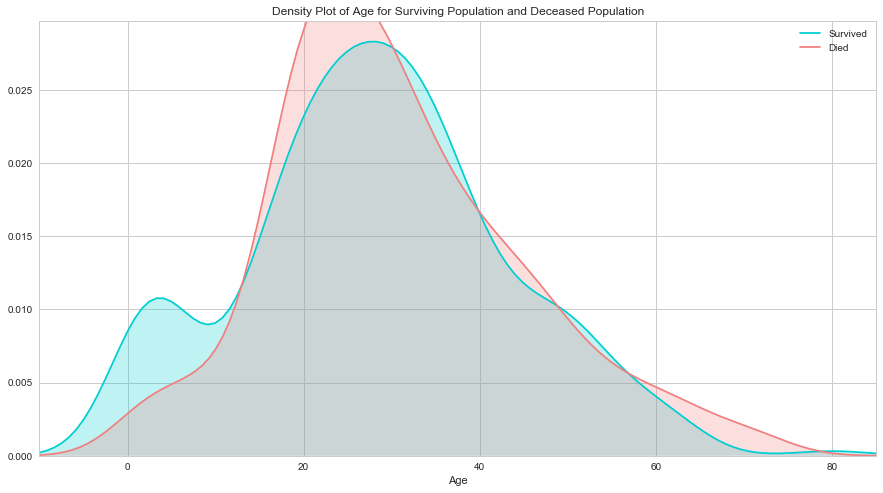

In [58]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

The age distribution for survivors and deceased is actually very similar.  One notable difference is that, of the survivors, a larger proportion were children.  The passengers evidently made an attempt to save children by giving them a place on the life rafts. 

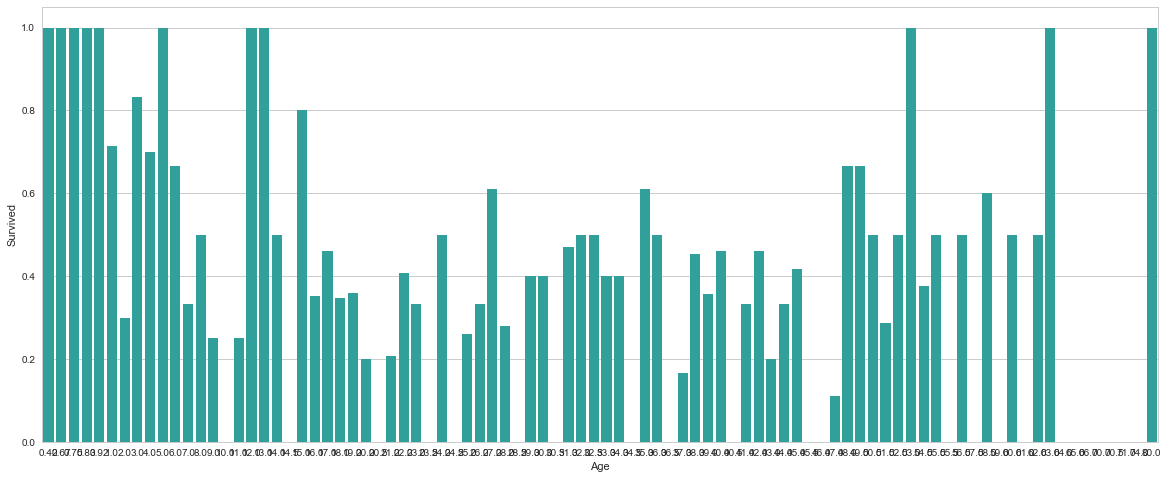

In [59]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

Considering the survival rate of passengers under 16, I'll also include another categorical variable in my dataset: "Minor"

In [60]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

<a id="t3.2."></a>
## 3.2. Exploration of Fare

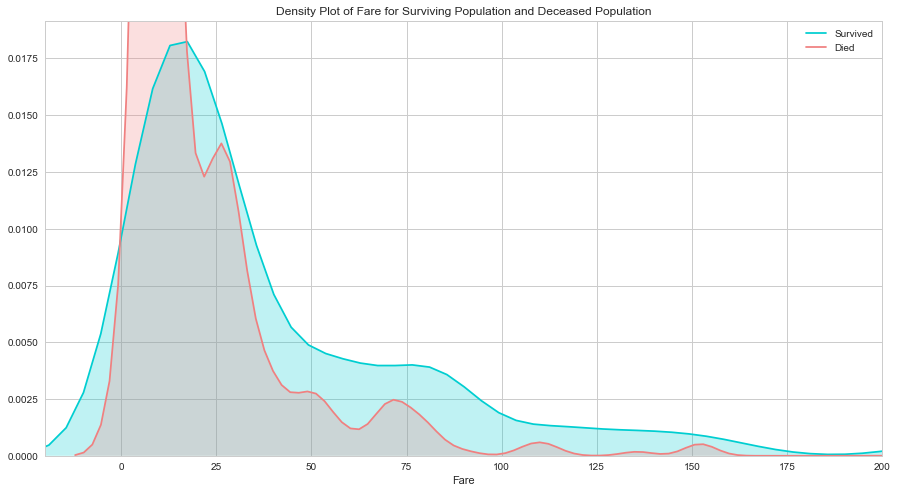

In [35]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model.  Passengers who paid lower fare appear to have been less likely to survive.  This is probably strongly correlated with Passenger Class, which we'll look at next.

<a id="t3.3."></a>
## 3.3. Exploration of Passenger Class

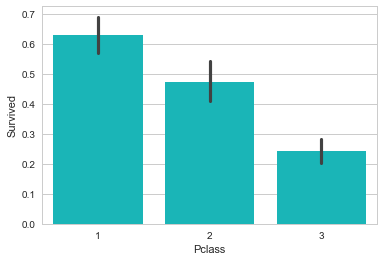

In [36]:
sns.barplot('Pclass', 'Survived', data=train_df, color="darkturquoise")
plt.show()

Unsurprisingly, being a first class passenger was safest.

<a id="t3.4."></a>
## 3.4. Exploration of Embarked Port

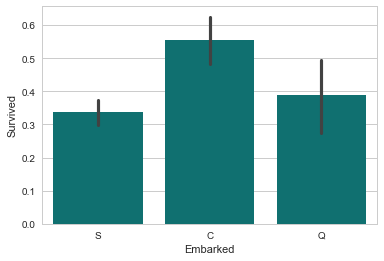

In [37]:
sns.barplot('Embarked', 'Survived', data=train_df, color="teal")
plt.show()

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate.  Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown.  This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck). <br> It's also worth noting the size of the whiskers in these plots.  Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest.  The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker.  It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

<a id="t3.5."></a>
## 3.5. Exploration of Traveling Alone vs. With Family

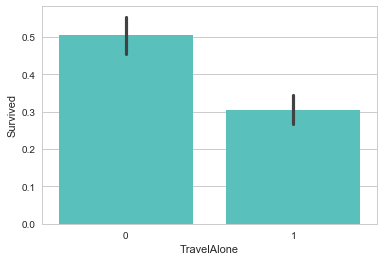

In [38]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male.

<a id="t3.6."></a>
## 3.6. Exploration of Gender Variable

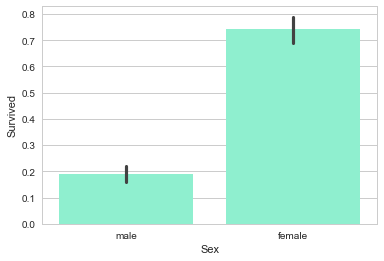

In [39]:
sns.barplot('Sex', 'Survived', data=train_df, color="aquamarine")
plt.show()

This is a very obvious difference.  Clearly being female greatly increased your chances of survival.

<a id="t4."></a>
# 4. Logistic Regression and Results

## Compute a simple model

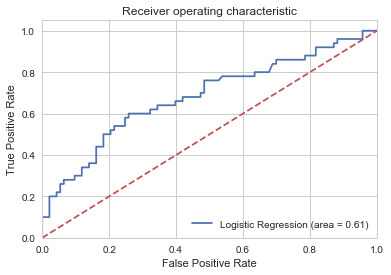

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# create X (features) and y (response)
Selected_features = ["Age","Fare"] 
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

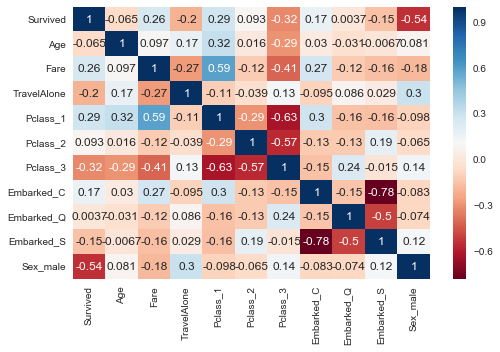

In [79]:
X = final_train

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap='RdBu')
plt.show()

## diagnostic plots

## Logistic Model Fitting

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg=LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

predicting the test set

In [52]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression on test set: {:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression on test set: 0.90


## Cross Validation

We will use Cross Validations to avoid overfitting. We will use 10 fold Cross Validation to train the model...

In [53]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10,random_state=7)
modelCV = LogisticRegression()
scoring='accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.898


## Confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10876   105]
 [ 1107   269]]


## Precision, Recall, F-score, and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10981
          1       0.72      0.20      0.31      1376

avg / total       0.89      0.90      0.88     12357



 Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer’s preferred term deposits that were promoted.

## ROC curve

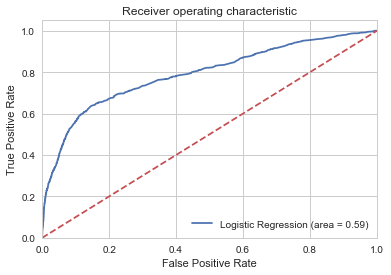

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


In [14]:
len(data['liked movie'])

59

<a id="t4.1."></a>
## 4.1. Feature selection

<a id="t4.1.1."></a>
### 4.1.1. Recursive feature elimination

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a `coef_ attribute` or through a `feature_importances_` attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

References: <br>
http://scikit-learn.org/stable/modules/feature_selection.html <br>

In [14]:
len(data['liked movie'])

59

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

KeyError: "['IsMinor'] not in index"

<a id="t4.1.2."></a>
### 4.1.2. Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 8
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


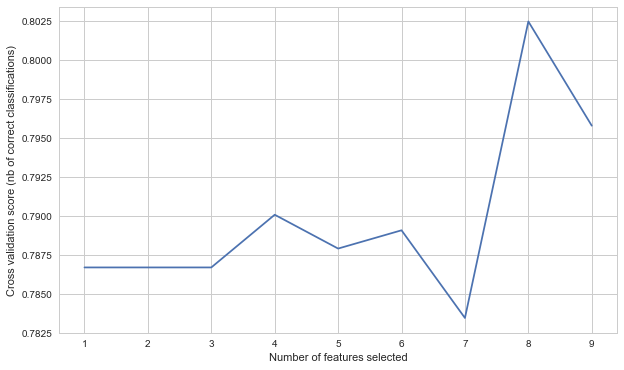

In [41]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

As we see, eight variables were kept. 

In [74]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True)
plt.show()

KeyError: "['IsMinor'] not in index"

<a id="t4.2."></a>
## 4.2. Review of model evaluation procedures

Motivation: Need a way to choose between machine learning models
* Goal is to estimate likely performance of a model on out-of-sample data

Initial idea: Train and test on the same data
* But, maximizing training accuracy rewards overly complex models which overfit the training data

Alternative idea: Train/test split
* Split the dataset into two pieces, so that the model can be trained and tested on different data
* Testing accuracy is a better estimate than training accuracy of out-of-sample performance
* Problem with train/test split
    * It provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
    * Testing accuracy can change a lot depending on a which observation happen to be in the testing set

Reference: <br>
http://www.ritchieng.com/machine-learning-cross-validation/ <br>

<a id="t4.2.1."></a>
### 4.2.1. Model evaluation based on simple train/test split using `train_test_split()` function

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.504
LogisticRegression auc is 0.839


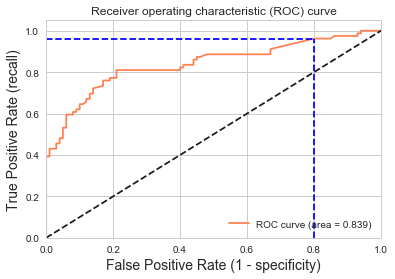

Using a threshold of 0.071 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

<a id="t4.2.2."></a>
### 4.2.2. Model evaluation based on K-fold cross-validation using `cross_val_score()` function 

In [44]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.802
LogisticRegression average log_loss is 0.454
LogisticRegression average auc is 0.850


<a id="t4.2.3."></a>
### 4.2.3. Model evaluation based on K-fold cross-validation using `cross_validate()` function 

In [45]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.802 (+/-0.025)
LogisticRegression average log_loss: 0.454 (+/-0.034)
LogisticRegression average auc: 0.850 (+/-0.025)


<font color=bleu>What happens when we add the feature "Fare"?<font>

In [46]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
X = final_train[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, final_train[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.796 (+/-0.028)
LogisticRegression average log_loss: 0.455 (+/-0.034)
LogisticRegression average auc: 0.849 (+/-0.025)


<font color=red>We notice that the model is slightly deteriorated. The "Fare" variable does not carry any useful information. Its presence is just a noise for the logistic regression model.<font>

In [49]:
final_test['Survived'] = logreg.predict(final_test[Selected_features])
final_test['PassengerId'] = test_df['PassengerId']

submission = final_test[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

submission.tail()

NotFittedError: This LogisticRegression instance is not fitted yet